In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

In [3]:
# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get Amazon, Ford and Bitcoin data
df = yfin.download(["AMZN", "F", "BTC-USD"], start, end, auto_adjust = False)["Adj Close"]

# Convert DataFrame index to timezone-aware (UTC)
df.index = df.index.tz_localize('UTC')

# Define split date as a timezone-aware timestamp
split_date = pd.Timestamp(datetime.date(2022, 6, 6)).tz_localize('UTC')  # Date of the stock split
split_ratio = 20

# Adjust AMZN prices only before the split date
for i in range(len(df["AMZN"])):
  if df["AMZN"].index[i] < split_date:
    df.loc[df["AMZN"].index[i], "AMZN"] = df.loc[df["AMZN"].index[i], "AMZN"] * split_ratio
df

[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,"1,855.319977","10,399.668945",7.107782
2019-08-02 00:00:00+00:00,"1,823.240051","10,518.174805",7.084877
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,"1,765.130005","11,805.653320",7.046705
...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.357336


In [5]:
df.head(10)

Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,"1,855.319977","10,399.668945",7.107782
2019-08-02 00:00:00+00:00,"1,823.240051","10,518.174805",7.084877
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,"1,765.130005","11,805.653320",7.046705
2019-08-06 00:00:00+00:00,"1,787.830048","11,478.168945",7.237568
2019-08-07 00:00:00+00:00,"1,793.399963","11,941.968750",7.275742
2019-08-08 00:00:00+00:00,"1,832.890015","11,966.407227",7.298646
2019-08-09 00:00:00+00:00,"1,807.579956","11,862.936523",7.214665


In [7]:
df.describe()

Ticker,AMZN,BTC-USD,F
count,"1,258.000000","1,827.000000","1,258.000000"
mean,"1,660.568330","30,854.084965",9.823950
std,"1,409.699586","18,350.840533",2.989040
min,81.820000,"4,970.788086",3.164624
25%,135.307495,"13,602.354004",7.132037
50%,"1,807.709961","28,033.562500",10.371442
75%,"3,161.874924","43,593.824219",11.503030
max,"3,731.409912","73,083.500000",19.979622


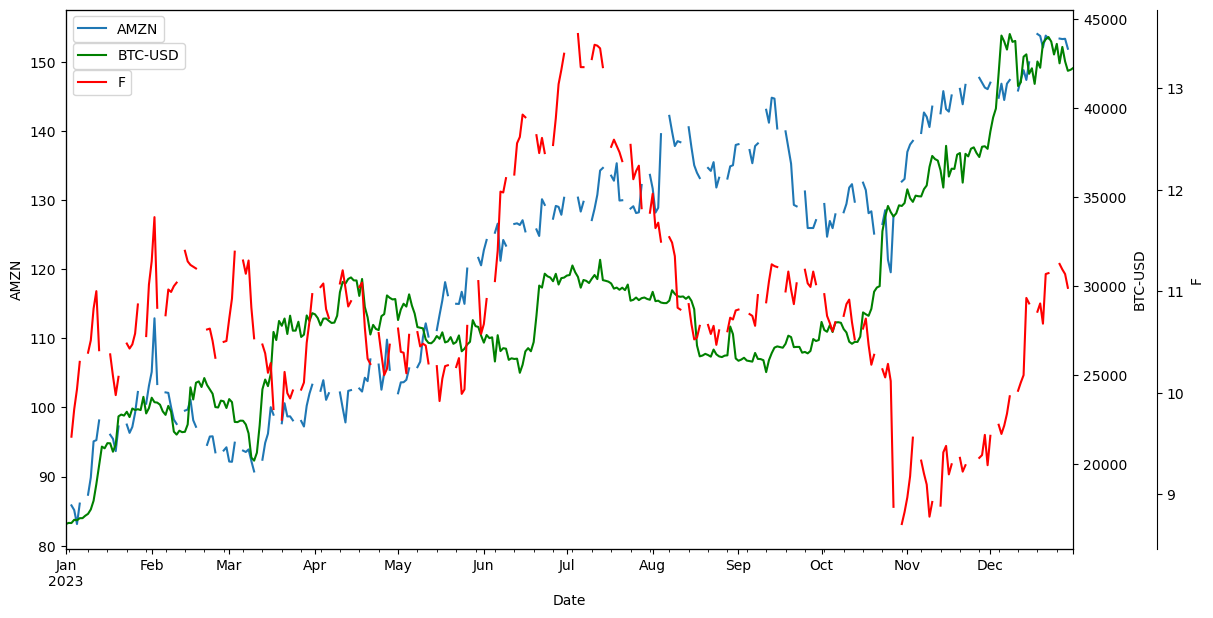

In [9]:
# Create the figure.
# We want a plot where the three assets have the same index (x-axis) but different scale (y-axis)
fig = plt.figure(figsize=(13,7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2023-01-01":"2023-12-31"].plot(ax=ax1, y='AMZN', legend=True)
df["2023-01-01":"2023-12-31"].plot(ax=ax2, y='BTC-USD', legend=True, color='g')
df["2023-01-01":"2023-12-31"].plot(ax=ax3, y='F', legend=True, color='r')

# We set the labels to the axes
ax1.set_ylabel('AMZN')
ax2.set_ylabel('BTC-USD')
ax3.set_ylabel('F')
ax3.spines['right'].set_position(('outward', 60))

# Set position of legends
ax1.legend(['AMZN'], loc='upper left')
ax2.legend(['BTC-USD'], loc='upper left', bbox_to_anchor=(0, 0.95))
ax3.legend(['F'], loc='upper left', bbox_to_anchor=(0, 0.9))

plt.show()

In [11]:
# Access the first row of the DataFrame
first_row = df.iloc[0]

# Assign price values to variables
amzn_price = first_row["AMZN"]
f_price = first_row["F"]
btc_price = first_row["BTC-USD"]

# Print price values
print("Purchase price of AMZN:", np.round(amzn_price, 3))
print("Purchase price of F:", np.round(f_price, 3))
print("Purchase price of BTC-USD:", np.round(btc_price, 3))
print(" - - - - - - - - - -")

# Divide $1,000 by each of price values to get number of shares
amzn_shares = 1000 / amzn_price
f_shares = 1000 / f_price
btc_shares = 1000 / btc_price

# Print number of shares for each ticker
print("Number of shares of AMZN:", np.round(amzn_shares, 3))
print("Number of shares of F:", np.round(f_shares, 3))
print("Number of shares of BTC-USD:", np.round(btc_shares, 3))

Purchase price of AMZN: 1855.32
Purchase price of F: 7.108
Purchase price of BTC-USD: 10399.669
 - - - - - - - - - -
Number of shares of AMZN: 0.539
Number of shares of F: 140.691
Number of shares of BTC-USD: 0.096


In [13]:
# Get last date values from df
last_row = df.iloc[-1]

# Assign end date price values to variables
amzn_price_end = last_row["AMZN"]
f_price_end = last_row["F"]
btc_price_end = last_row["BTC-USD"]

# Print end date prices
print("End price of AMZN:", np.round(amzn_price_end, 3))
print("End price of F:", np.round(f_price_end, 3))
print("End price of BTC-USD:", np.round(btc_price_end, 3))
print(" - - - - - - - - - -")

# Compute end date values for each ticker
amzn_value = amzn_price_end * amzn_shares *20  # need 20 times multiple due to stock split
f_value = f_price_end * f_shares
btc_value = btc_price_end * btc_shares

# Print end date values
print("Holding value of AMZN:", np.round(amzn_value, 3))
print("Holding value of F:", np.round(f_value, 3))
print("Holding value of BTC-USD:", np.round(btc_value, 3))

End price of AMZN: 186.98
End price of F: 10.179
End price of BTC-USD: 64619.25
 - - - - - - - - - -
Holding value of AMZN: 2015.609
Holding value of F: 1432.036
Holding value of BTC-USD: 6213.587


In [15]:
# Compute simple returns
amzn_return = (amzn_value - 1000) / 1000
f_return = (f_value - 1000) / 1000
btc_return = (btc_value - 1000) / 1000

# Print the returns
print("Simple return of AMZN:", np.round(amzn_return * 100, 3), "%")
print("Simple return of F:", np.round(f_return * 100, 3), "%")
print("Simple return of BTC-USD:", np.round(btc_return * 100, 3), "%")

Simple return of AMZN: 101.561 %
Simple return of F: 43.204 %
Simple return of BTC-USD: 521.359 %


In [17]:
df = df.join(yfin.download(["BLV"], start, end, auto_adjust = False)["Adj Close"].tz_localize('UTC'))
#df.rename(columns={"Adj Close": "BLV"}, inplace=True)
df

[*********************100%***********************]  1 of 1 completed


Ticker,AMZN,BTC-USD,F,BLV
Date,,,,
2019-08-01 00:00:00+00:00,"1,855.319977","10,399.668945",7.107782,77.323608
2019-08-02 00:00:00+00:00,"1,823.240051","10,518.174805",7.084877,77.865005
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN,NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN,NaN
2019-08-05 00:00:00+00:00,"1,765.130005","11,805.653320",7.046705,78.531898
...,...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN,NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN,NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.357336,69.508568


In [19]:
# In order to calculate the returns of the stocks, we need to drop the NA rows.
returns_stocks_BLV = df[['AMZN', 'F', 'BLV']].dropna().pct_change()

# Crypto is traded 24/7
returns_BTC = df[['BTC-USD']].pct_change()

# We broadcast the index of crypto on the stocks in order to join the datasets having NaN for weekends within stocks and BLV columns
returns_stocks = returns_stocks_BLV.reindex(returns_BTC.index)
returns = returns_BTC.join(returns_stocks_BLV, how = 'outer')[1:]
returns

Ticker,BTC-USD,AMZN,F,BLV
Date,,,,
2019-08-02 00:00:00+00:00,0.011395,-0.017291,-0.003223,0.007002
2019-08-03 00:00:00+00:00,0.028860,NaN,NaN,NaN
2019-08-04 00:00:00+00:00,0.013719,NaN,NaN,NaN
2019-08-05 00:00:00+00:00,0.076158,-0.031872,-0.005388,0.008565
2019-08-06 00:00:00+00:00,-0.027740,0.012860,0.027085,0.006695
...,...,...,...,...
2024-07-27 00:00:00+00:00,-0.001454,NaN,NaN,NaN
2024-07-28 00:00:00+00:00,0.006526,NaN,NaN,NaN
2024-07-29 00:00:00+00:00,-0.021038,0.003836,-0.016086,0.003785


In [21]:
returns.describe()

Ticker,BTC-USD,AMZN,F,BLV
count,"1,826.000000","1,257.000000","1,257.000000","1,257.000000"
mean,0.001579,0.000032,0.000671,-0.000034
std,0.033707,0.034772,0.027760,0.009179
min,-0.371695,-0.949003,-0.183614,-0.075169
25%,-0.013480,-0.011077,-0.013605,-0.005254
50%,0.000234,0.000554,0.000000,0.000571
75%,0.015996,0.012220,0.014212,0.005206
max,0.187465,0.135359,0.234414,0.049138


In [23]:
(returns.describe()[["BTC-USD", "F"]])

Ticker,BTC-USD,F
count,"1,826.000000","1,257.000000"
mean,0.001579,0.000671
std,0.033707,0.027760
min,-0.371695,-0.183614
25%,-0.013480,-0.013605
50%,0.000234,0.000000
75%,0.015996,0.014212
max,0.187465,0.234414


In [25]:
#Annualize BTC-USD with 365 trading days
(np.prod(returns_BTC + 1, axis=0) ** (1/len(returns_BTC))) ** (365) - 1

Ticker
BTC-USD   0.440439
dtype: float64

In [27]:
#Annualize stocks with 252 trading days
(np.prod(returns_stocks_BLV + 1, axis=0) ** (1/len(returns_stocks_BLV))) ** (252) - 1

Ticker
AMZN   -0.368522
F       0.074584
BLV    -0.018936
dtype: float64

In [29]:
# Get innitial and end prices from df
blv_price = df.iloc[0]["BLV"]
blv_price_end = df.iloc[-1]["BLV"]

# Compute simple return rate
blv_return_rate = (blv_price_end - blv_price) / blv_price
print("Simple return rate of BLV:", np.round(blv_return_rate * 100, 3), "%")

# Compute total simple return
total_simple_return = 1000 * (1 + blv_return_rate)
print("Total simple return of BLV: $", np.round(total_simple_return, 3))


Simple return rate of BLV: -9.103 %
Total simple return of BLV: $ 908.975


In [31]:
# Uncomment the following lines to pull most recent data (optional)
#start = datetime.date.today()-datetime.timedelta(365*10)
#end = datetime.date.today()
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get data
prices = yfin.download(["^GSPC", "^RUT"], start, end, auto_adjust = False)["Adj Close"]

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500", "^RUT": "Russell2000"})

# Get dataset stats
prices.describe()


[*********************100%***********************]  2 of 2 completed


Ticker,SP500,Russell2000
count,"1,258.000000","1,258.000000"
mean,"4,028.833253","1,865.957234"
std,685.682781,284.232353
min,"2,237.399902",991.159973
25%,"3,502.235046","1,674.337524"
50%,"4,110.745117","1,873.654968"
75%,"4,468.547485","2,067.780090"
max,"5,667.200195","2,442.739990"


In [33]:
# Display first 5 rows
prices.head()


Ticker,SP500,Russell2000
Date,,
2019-08-01,"2,953.560059","1,550.760010"
2019-08-02,"2,932.050049","1,533.660034"
2019-08-05,"2,844.739990","1,487.410034"
2019-08-06,"2,881.770020","1,502.089966"
2019-08-07,"2,883.979980","1,500.689941"


In [35]:
# Calculate log returns
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]
df.head()


Ticker,SP500,Russell2000
Date,,
2019-08-02,-0.007309,-0.011088
2019-08-05,-0.030230,-0.030621
2019-08-06,0.012933,0.009821
2019-08-07,0.000767,-0.000932
2019-08-08,0.018588,0.020734


In [37]:
# Calculate average annual return over the past 5 years
avg_returns = df.mean() * 252

# Calculate future value for each index
future_value_sp500 = 1000 * np.exp(avg_returns["SP500"] * 5)
future_value_russell2000 = 1000 * np.exp(avg_returns["Russell2000"] * 5)

print("Future Value of SP500:", future_value_sp500)
print("Future Value of Russell2000:", future_value_russell2000)

Future Value of SP500: 1872.5041981875975
Future Value of Russell2000: 1455.0892174400194


In [39]:
# Calculate average daily return over the past 5 years
avg_daily_returns = df.mean()

# Calculate future value for each index (using daily returns and 5 years)
num_days = 252 * 5  # Number of trading days in 5 years
future_value_sp500 = 1000 * np.exp(avg_daily_returns["SP500"] * num_days)
future_value_russell2000 = 1000 * np.exp(avg_daily_returns["Russell2000"] * num_days)

print("Future Value of SP500:", future_value_sp500)
print("Future Value of Russell2000:", future_value_russell2000)

Future Value of SP500: 1872.5041981875975
Future Value of Russell2000: 1455.0892174400194


In [41]:
prices.max()

Ticker
SP500         5,667.200195
Russell2000   2,442.739990
dtype: float64

In [43]:
prices.min()

Ticker
SP500         2,237.399902
Russell2000     991.159973
dtype: float64

In [45]:
prices.max() - prices.min()

Ticker
SP500         3,429.800293
Russell2000   1,451.580017
dtype: float64

In [47]:
# Slice last year from prices data
end = pd.Timestamp(end).tz_localize(None)  # Remove timezone info

currYear = prices.loc[
    pd.Timestamp(end - datetime.timedelta(365)) : end
]

# Calculate the difference between the maximum and minimum values in the currYear
currYear.max() - currYear.min()

Ticker
SP500         1,549.830078
Russell2000     626.729980
dtype: float64

In [49]:
(currYear.max() - currYear.min()) / prices.iloc[-1]

Ticker
SP500         0.280649
Russell2000   0.277993
dtype: float64

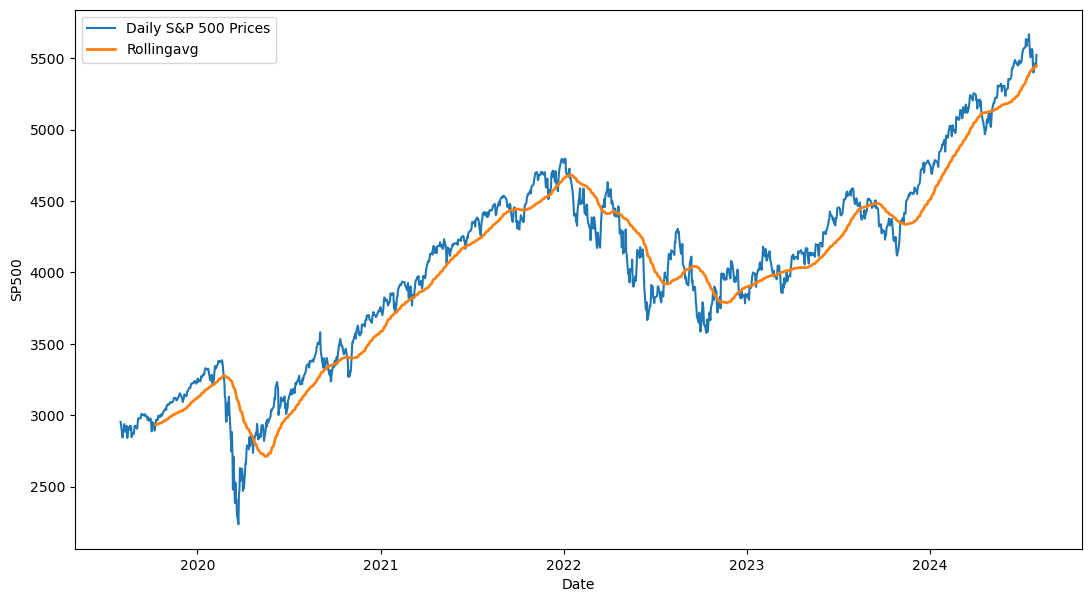

In [51]:
# Calculate the 50-day rolling average of the "SP500" column
prices["SP500 50 day_rolling_avg"] = prices.SP500.rolling(50).mean()

# set figure size and plot a simple time series plot using seaborn.lineplot()
plt.figure(figsize=(13, 7))
sns.lineplot(x="Date", y="SP500", data=prices, label="Daily S&P 500 Prices")

# plot rolling average
sns.lineplot(x="Date", y="SP500 50 day_rolling_avg", data=prices, label="Rollingavg", linewidth=2)
plt.show()

In [53]:
((abs(prices - prices.rolling(50).mean())) / prices).mean()

Ticker
SP500                      0.037068
Russell2000                0.048725
SP500 50 day_rolling_avg   0.028209
dtype: float64

In [55]:
prices.std()

Ticker
SP500                      685.682781
Russell2000                284.232353
SP500 50 day_rolling_avg   635.644388
dtype: float64

In [57]:
df.std()

Ticker
SP500         0.013458
Russell2000   0.017503
dtype: float64

In [59]:
def investCompare(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    startTime = pd.Timestamp(startTime).tz_localize('UTC')
    endTime = pd.Timestamp(endTime).tz_localize('UTC')
    prices = yfin.download(list(tickers.keys()), startTime, endTime, auto_adjust = False)["Adj Close"]
    prices = prices.rename(columns=tickers)
    returns = np.log(prices) - np.log(prices.shift(1))
    returns = returns.iloc[1:, 0:]

    # pull data into separate DataFrame to just look at the last 365 days of
    # data for calculating our high/low metric
    currYear = prices.loc[(endTime - datetime.timedelta(365)).tz_convert(prices.index.tz) : endTime.tz_convert(prices.index.tz)]

    # High-Low
    highLow = (currYear.max() - currYear.min()) / prices.iloc[-1]
    highLow = pd.DataFrame(highLow, columns=["HighMinusLow"])

    # Moving average volatility
    MA = pd.DataFrame(
        ((abs(prices - prices.rolling(50).mean())) / prices).mean(),
        columns=["MovingAverageVolatility"],
    )
    investments = pd.merge(highLow, MA, left_index=True, right_index=True)

    # Standard deviation
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.std(), columns=["StandardDeviation"]),
        left_index=True,
        right_index=True,
    )

    # Daily return
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.mean(), columns=["Daily Return Percentage"]),
        left_index=True,
        right_index=True,
    )

    # Format columns:
    # Hogh-Low column rounded to 5 decimal
    investments["HighMinusLow"] = investments["HighMinusLow"].round(4).astype(str)

    # MA, std and returns columns as percentage
    columns = ["MovingAverageVolatility", "StandardDeviation", "Daily Return Percentage"]
    for col in columns:
      investments[col] = (investments[col] * 100).round(3).astype(str) + '%'

    return investments

In [62]:
investCompare(
    datetime.date(2019, 8, 1),
    datetime.date(2024, 8, 1),
    {"^GSPC": "SP500", "^RUT": "Russell2000"},
)

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
SP500,0.2806,3.707%,1.346%,0.05%
Russell2000,0.278,4.873%,1.75%,0.03%


In [64]:
investCompare(
    datetime.date(2019, 8, 1),
    datetime.date(2024, 8, 1),
    {"^GSPC": "SP500", "^RUT": "Russell2000", "AAPL": "Apple"},
)

[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Apple,0.3154,6.462%,2.008%,0.118%
SP500,0.2806,3.707%,1.346%,0.05%
Russell2000,0.278,4.873%,1.75%,0.03%


In [66]:
# Set start and end dates
start = datetime.date(2022, 8, 1)
end = datetime.date(2024, 8, 1)

# Compute investments stats using investCompare() function
investCompare(start, end, {"VUG": "Growth", "VTV": "Value"})

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Value,0.2306,2.546%,0.825%,0.05%
Growth,0.3582,4.083%,1.284%,0.078%


In [68]:
# Set start and end dates
start = datetime.date(2010, 8, 1)
end = datetime.date(2024, 8, 1)

# Compute investments stats using investCompare() function
investCompare(start, end, {"VUG": "Growth", "VTV": "Value"})

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Value,0.2306,2.753%,1.043%,0.045%
Growth,0.3582,3.435%,1.224%,0.059%


In [70]:
# Comparing Domestic vs. Foreign Stocks
start = datetime.date(2022, 8, 1)
end = datetime.date(2024, 8, 1)
investCompare(start, end,{"^GSPC": "SP500", "SPEU": "Europe ETF", "GXC": "China ETF"})

[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
China ETF,0.2629,4.816%,1.633%,-0.025%
Europe ETF,0.2324,3.378%,1.051%,0.055%
SP500,0.2806,2.985%,0.98%,0.058%


In [72]:
# Comparing Domestic vs. Foreign Stocks
start = datetime.date(2010, 8, 1)
end = datetime.date(2024, 8, 1)
investCompare(start, end,{"^GSPC": "SP500", "SPEU": "Europe ETF", "GXC": "China ETF"})

[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
China ETF,0.2629,4.521%,1.567%,0.006%
Europe ETF,0.2324,3.241%,1.233%,0.021%
SP500,0.2806,2.884%,1.085%,0.045%
